# Projectile Motion with Drag

In [1]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

## Problem Statement

Construct a mathematical model of an object shot into the air and subject to the forces of drag and gravity.

## Variables and Parameters

| Description | Symbol | Dimensions | Type |
| :---: | :---: | :---: | :---: |
| position of projectile in $x$-direction | $x$ | L | dependent variable |
| position of projectile in $y$-direction | $y$ | L | dependent variable |
| time | $t$ | T | independent variable |
| mass of the projectile | $m$ | M | parameter |
| drag coefficient | $c$ | MT<sup>-1</sup> | parameter |
| constant of gravity | $g$ | LT<sup>-2</sup> | parameter |
| initial velocity | $v_0$ | LT<sup>-1</sup> | parameter |
| initial angle of velocity | $\theta$ | 1 | parameter |

## Assumptions and Constraints

* projectile moves in $xy$-plane only
* initial position is at the origin $(0,0)$

## Construction

The force of drag is proportional to velocity and acts in the direction oppposite the velocity

$$
\mathbf{F}_d = -c \| \mathbf{x}'(t) \| \frac{\mathbf{x}'(t)}{\| \mathbf{x}'(t) \|} = -c\left( x',y' \right)
$$

The force of gravity acts in the veritcal direction

$$
\mathbf{F}_g = (0,-mg)
$$

Apply Newton's second law to find the equations

$$
\begin{align*}
m x'' &= - cx' \\
m y'' &= - mg - cy' \\
x(0) &= y(0) = 0 \\
x'(0) &= v_0 \cos \theta \\
y'(0) &= v_0 \sin \theta
\end{align*}
$$

Apply the nondimensionalization procedure. Let $t = [t]t^*$, $x = [x]x^*$ and $y = [y]y^*$ and make the subsitution

$$
\begin{align*}
\frac{m[x]}{[t]^2} \frac{d^2x^*}{dt^{*2}} &= -\frac{c[x]}{[t]} \frac{dx^*}{dt^*} \\
\frac{m[y]}{[t]^2} \frac{d^2y^*}{dt^{*2}} &= -mg - \frac{c[y]}{[t]} \frac{dy^*}{dt^*} \\
x^*(0) &= y^*(0) = 0 \\
\frac{[x]}{[t]} \frac{dx^*}{dt^*}(0) &= v_0 \cos \theta \\
\frac{[y]}{[t]} \frac{dy^*}{dt^*}(0) &= v_0 \sin \theta
\end{align*}
$$

Divide by second derivative term and simplify

$$
\begin{align*}
\frac{d^2x^*}{dt^{*2}} &= -\frac{c[t]}{m} \frac{dx^*}{dt^*} \\
\frac{d^2y^*}{dt^{*2}} &= -\frac{g[t]^2}{[y]} - \frac{c[t]}{m} \frac{dy^*}{dt^*} \\
x^*(0) &= y^*(0) = 0 \\
\frac{dx^*}{dt^*}(0) &= v_0 \frac{[t]}{[x]} \cos \theta \\
\frac{dy^*}{dt^*}(0) &= v_0 \frac{[t]}{[y]} \sin \theta
\end{align*}
$$

Choose $[t] = \frac{m}{c}$ and $[x] = [y] = \frac{gm^2}{c^2}$ and write

$$
\begin{align*}
\frac{d^2x^*}{dt^{*2}} &= -\frac{dx^*}{dt^*} \\
\frac{d^2y^*}{dt^{*2}} &= -1 - \frac{dy^*}{dt^*} \\
x^*(0) &= y^*(0) = 0 \\
\frac{dx^*}{dt^*}(0) &= v^*_0 \cos \theta \\
\frac{dy^*}{dt^*}(0) &= v^*_0 \sin \theta
\end{align*}
$$

where $v_0^* = \frac{v_0c}{gm}$. These equations are independent of each other and can be solved analytically. However, we will approximate solutions using SciPy using the first order system with $u_0 = x^*$, $u_1 = \frac{dx^*}{dt^*}$, $u_2 = y^*$, $u_3 = \frac{dy^*}{dt^*}$:

$$
\begin{align*}
\frac{du_0}{dt^*} &= u_1 \\
\frac{du_1}{dt^*} &= -u_1 \\
\frac{du_2}{dt^*} &= u_3 \\
\frac{du_3}{dt^*} &= - 1 - u_3 \\
u_0(0) &= u_2(0) = 0 \\
u_1(0) &= v^*_0 \cos \theta \\
u_3(0) &= v^*_0 \sin \theta
\end{align*}
$$

## Analysis

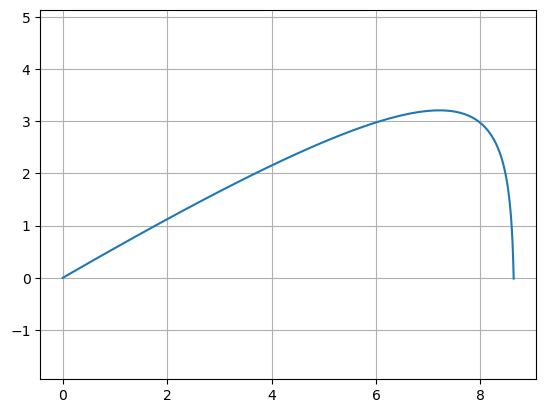

In [12]:
def f(u,t):
    dudt = np.zeros(4)
    dudt[0] = u[1]
    dudt[1] = -u[1]
    dudt[2] = u[3]
    dudt[3] = -1 - u[3]
    return dudt

v0 = 10; theta = np.pi/6
u0 = [0,v0*np.cos(theta),0,v0*np.sin(theta)]
t = np.linspace(0,6,200)
u = spi.odeint(f,u0,t)
plt.plot(u[:,0],u[:,2]), plt.axis('equal'), plt.grid(True)
plt.show()